In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from IPython.display import clear_output

%matplotlib inline

In [2]:
pokemon = pd.read_csv('Pokemon.csv')

In [3]:
pokemon = pokemon.replace("CharizardMega Charizard X", "Charizard Mega X")
pokemon = pokemon.replace("CharizardMega Charizard Y", "Charizard Mega Y")
pokemon = pokemon.replace("MewtwoMega Mewtwo X", "Mewtwo Mega X")
pokemon = pokemon.replace("MewtwoMega Mewtwo Y", "Mewtwo Mega Y")

In [4]:
def image_path(poke_id):
    if poke_id % 100 == 0:
        print("Loading (" + str(poke_id) +"/800)")
    elif poke_id == 800:
        print("Loading complete!")
    if "Meganium" in pokemon.loc[poke_id]['Name']:
        return 'sprites/154.png'
    elif "Mega X" in pokemon.loc[poke_id]['Name']:
        return 'sprites/' + str(pokemon['#'][poke_id]) + '-mega-x.png'
    elif "Mega Y" in pokemon.loc[poke_id]['Name']:
        return 'sprites/' + str(pokemon['#'][poke_id]) + '-mega-y.png'
    elif "Mega" in pokemon.loc[poke_id]['Name']:
        return 'sprites/' + str(pokemon['#'][poke_id]) + '-mega.png'
    else:
        return 'sprites/' + str(pokemon['#'][poke_id]) + '.png'

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def statsplot(x,y,title,xlabel,ylabel):
    
    fig, ax = plt.subplots(figsize=(20, 10))
    for loop in range(0,170):
        imscatter(x[loop], y[loop], image_path(loop), zoom=1.5, ax=ax)
        ax.scatter(x[loop],y[loop])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
    plt.show()
    

Loading (0/800)
Loading (100/800)


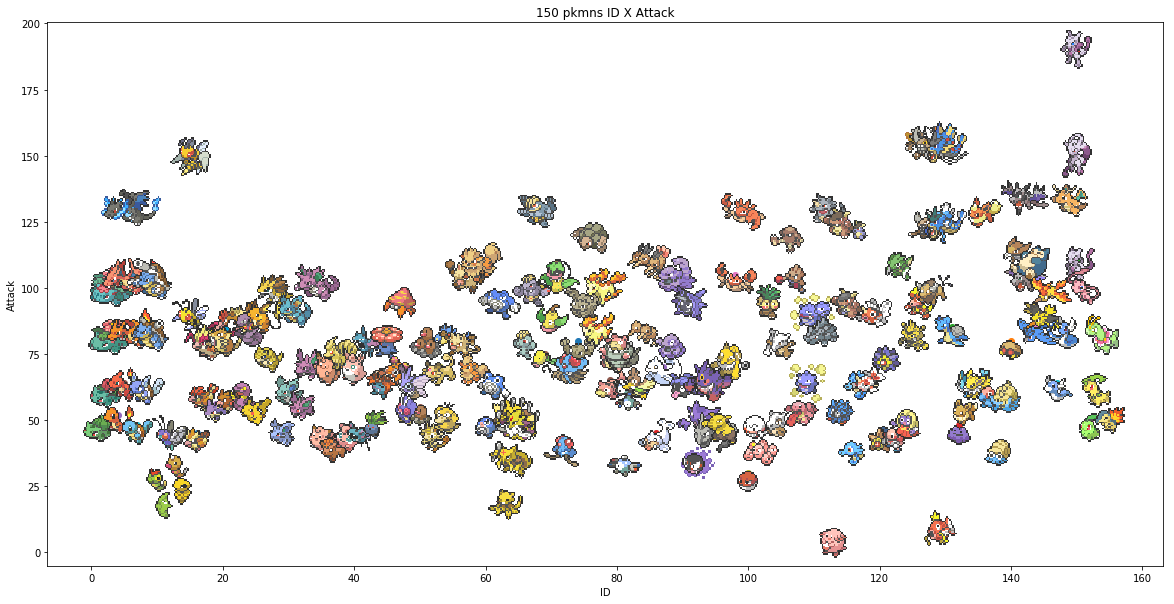

In [5]:
x=pokemon['#']
y=pokemon['Attack']
statsplot(x,y,'150 pkmns ID X Attack','ID','Attack')